In [1]:
import pandas as pd
import numpy as np
import hts

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (16, 8)

In [2]:
df = pd.read_csv('data_q.csv') # выбрать файл data_q или data_y для работы с данными по кварталам и годам соответственно
df = df.drop(columns= ['Unnamed: 0'])

In [3]:
df

,Область,Округ,Год,Кол-во
0,Белгородская область,Центральный федеральный округ,01.01.2016,37568
1,Брянская область,Центральный федеральный округ,01.01.2016,13415
2,Владимирская область,Центральный федеральный округ,01.01.2016,66342
3,Воронежская область,Центральный федеральный округ,01.01.2016,73521
4,Ивановская область,Центральный федеральный округ,01.01.2016,61345
...,...,...,...,...
1717,Амурская область,Дальневосточный федеральный округ,01.01.2021,40984
1718,Магаданская область,Дальневосточный федеральный округ,01.01.2021,11419
1719,Сахалинская область,Дальневосточный федеральный округ,01.01.2021,42957
1720,Еврейская автономная область,Дальневосточный федеральный округ,01.01.2021,5786


In [4]:
mapping_dict = {
    "Центральный федеральный округ": "ЦФО",
    "Приволжский федеральный округ": "ПФО",
    "Дальневосточный федеральный округ": "ДФО",
    "Северо-Западный федеральный округ": "СЗФО",
    "Сибирский федеральный округ": "СФО",
    "Южный федеральный округ": "ЮФО",
    "Северо-Кавказский федеральный округ": "СКФО",
    "Уральский федеральный округ": "УФО"
}

df["Округ"] = df["Округ"].map(mapping_dict)

# столбец добавляется для создания иерархии
df["Округ_Область"] = df.apply(lambda x: f"{x['Округ']}_{x['Область']}", axis=1)

In [5]:
df

,Область,Округ,Год,Кол-во,Округ_Область
0,Белгородская область,ЦФО,01.01.2016,37568,ЦФО_ Белгородская область
1,Брянская область,ЦФО,01.01.2016,13415,ЦФО_ Брянская область
2,Владимирская область,ЦФО,01.01.2016,66342,ЦФО_ Владимирская область
3,Воронежская область,ЦФО,01.01.2016,73521,ЦФО_ Воронежская область
4,Ивановская область,ЦФО,01.01.2016,61345,ЦФО_ Ивановская область
...,...,...,...,...,...
1717,Амурская область,ДФО,01.01.2021,40984,ДФО_ Амурская область
1718,Магаданская область,ДФО,01.01.2021,11419,ДФО_ Магаданская область
1719,Сахалинская область,ДФО,01.01.2021,42957,ДФО_ Сахалинская область
1720,Еврейская автономная область,ДФО,01.01.2021,5786,ДФО_ Еврейская автономная область


In [6]:
df['Кол-во'] = df['Кол-во']/1000 #отображение в сотнях тысяч

In [7]:
# нижний уровень
df_bottom_level = df.pivot(index="Год", columns="Округ_Область", values="Кол-во")

#средний уровень
df_middle_level = df.groupby(["Год", "Округ"]) \
                    .sum() \
                    .reset_index(drop=False) \
                    .pivot(index="Год", columns="Округ", values="Кол-во")

# верхний уровень
df_total = df.groupby("Год")["Кол-во"] \
             .sum() \
             .to_frame() \
             .rename(columns={"Кол-во": "total"})

# соединение
hierarchy_df = df_bottom_level.join(df_middle_level) \
                              .join(df_total)
hierarchy_df.index = pd.to_datetime(hierarchy_df.index, format="%d.%m.%Y")
hierarchy_df = hierarchy_df.resample("QS") \
                           .sum()

In [8]:
hierarchy_df

,ДФО_ Амурская область,ДФО_ Еврейская автономная область,ДФО_ Забайкальский край,ДФО_ Камчатский край,ДФО_ Магаданская область,ДФО_ Приморский край,ДФО_ Республика Бурятия,ДФО_ Республика Саха (Якутия),ДФО_ Сахалинская область,ДФО_ Хабаровский край,...,ЮФО_ Ростовская область,ДФО,ПФО,СЗФО,СКФО,СФО,УФО,ЦФО,ЮФО,total
Год,,,,,,,,,,,,,,,,,,,,,
2016-01-01,54.469,3.746,20.723,23.484,12.883,128.581,33.948,32.096,35.916,92.351,...,93.977,439.625,1473.791,1099.223,283.413,1028.583,665.758,2517.848,1045.175,8553.416
2016-04-01,30.394,5.759,22.191,29.497,9.145,208.377,53.321,43.804,25.742,115.210,...,275.775,545.779,1675.943,1367.839,299.196,880.561,817.775,2838.212,2004.121,10429.426
2016-07-01,47.613,6.771,40.373,43.370,22.505,356.748,54.014,54.639,24.076,127.132,...,298.750,780.172,2014.349,1545.356,342.150,1173.758,1011.288,3201.156,3300.790,13369.019
2016-10-01,27.891,5.831,25.388,38.952,18.239,221.859,39.387,45.378,65.744,99.437,...,112.342,590.526,1860.563,1235.901,380.188,997.648,801.641,3187.928,1601.292,10655.687
2017-01-01,59.951,5.410,28.793,23.567,13.898,138.182,48.257,33.235,64.521,99.412,...,98.188,517.731,1508.798,1018.376,280.402,853.809,722.651,2624.440,1186.367,8712.574
2017-04-01,36.924,4.585,56.705,25.589,16.362,168.404,74.532,34.045,15.539,172.509,...,322.746,608.086,1588.441,1544.402,328.674,880.884,700.463,4572.736,1845.270,12068.956
2017-07-01,25.226,4.834,56.131,39.530,16.421,299.198,143.450,42.504,38.228,178.476,...,292.506,847.037,2195.550,1733.686,385.972,1459.155,864.832,4295.606,4302.732,16084.570
2017-10-01,28.551,4.754,60.772,22.744,17.456,188.002,61.571,33.069,28.193,133.267,...,163.978,580.806,1882.951,1284.941,349.006,994.179,782.638,3804.719,2027.724,11706.964
2018-01-01,55.639,4.624,23.561,26.672,14.624,149.415,41.389,47.596,39.877,109.079,...,109.964,516.134,1660.677,1218.539,263.483,793.447,841.787,3108.102,1220.844,9623.013


In [9]:
hierarchy_df.fillna(0, inplace=True)

In [10]:
print(f"Количество областей: {df_bottom_level.shape[1]}")
print(f"Количество округов: {df_middle_level.shape[1]}")

Количество областей: 82
Количество округов: 8


In [11]:
# создание иерархии
districts = df["Округ"].unique()
regions = df["Округ_Область"].unique()

total = {'total': list(districts)}
state = {k: [v for v in regions if v.startswith(k)] for k in districts}
hierarchy = {**total, **state}

In [12]:
hierarchy 

{'total': ['ЦФО', 'СЗФО', 'ЮФО', 'СКФО', 'ПФО', 'УФО', 'СФО', 'ДФО'],
 'ЦФО': ['ЦФО_        Белгородская область',
  'ЦФО_        Брянская область',
  'ЦФО_        Владимирская область',
  'ЦФО_        Воронежская область',
  'ЦФО_        Ивановская область',
  'ЦФО_        Калужская область',
  'ЦФО_        Костромская область',
  'ЦФО_        Курская область',
  'ЦФО_        Липецкая область',
  'ЦФО_        Московская область',
  'ЦФО_        Орловская область',
  'ЦФО_        Рязанская область',
  'ЦФО_        Смоленская область',
  'ЦФО_        Тамбовская область',
  'ЦФО_        Тверская область',
  'ЦФО_        Тульская область',
  'ЦФО_        Ярославская область',
  'ЦФО_        Город Москва столица Российской Федерации город федерального значения'],
 'СЗФО': ['СЗФО_        Республика Карелия',
  'СЗФО_        Республика Коми',
  'СЗФО_        Архангельская область',
  'СЗФО_        Вологодская область',
  'СЗФО_        Калининградская область',
  'СЗФО_        Ленинградская о

<AxesSubplot:title={'center':'total level'}, xlabel='Год'>

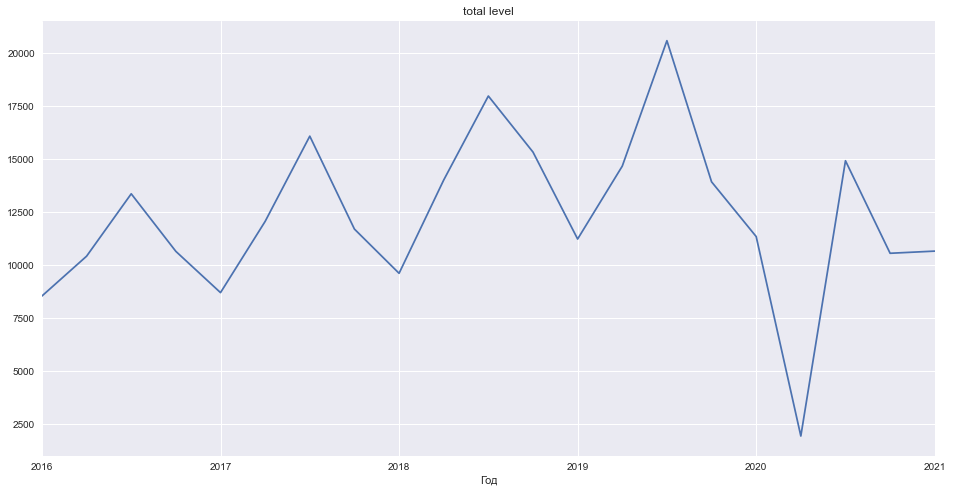

In [13]:
hierarchy_df["total"].plot(title="total level")

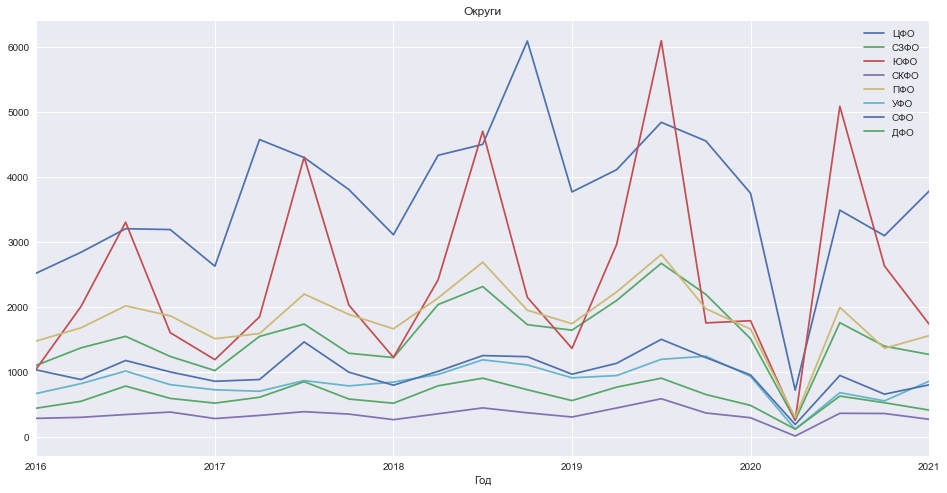

In [14]:
ax = hierarchy_df[hierarchy['total']].plot(title="Округи")
ax.legend(bbox_to_anchor=(1.0, 1.0));

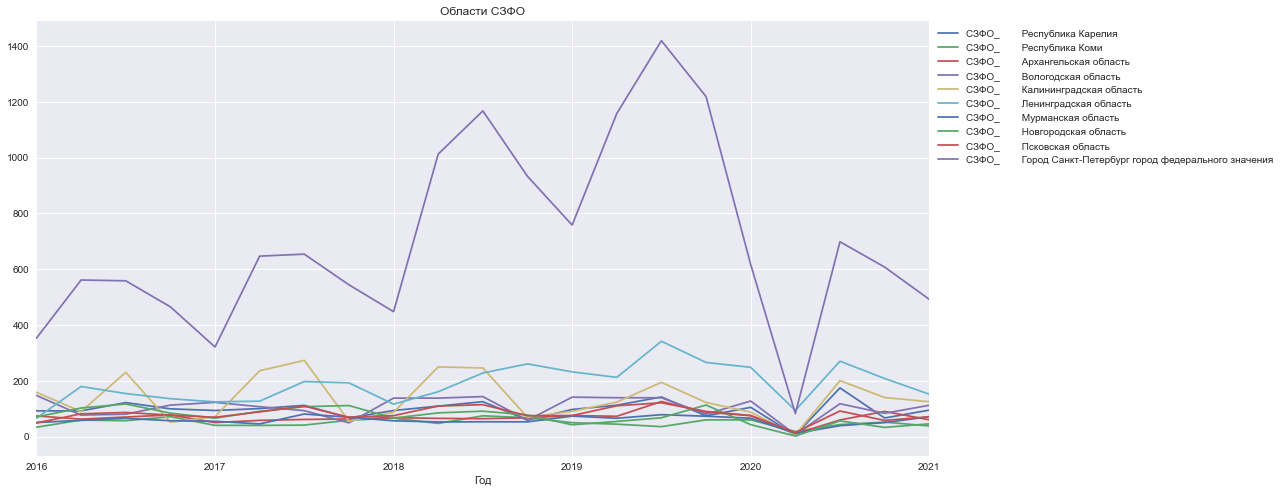

In [15]:
ax = hierarchy_df[hierarchy['СЗФО']].plot(title="Области CЗФО")
ax.legend(bbox_to_anchor=(1.0, 1.0));

In [16]:
steps_ahead = 1

def plot_results(pred_df, source_df, cols_to_plot, mae):
    if type(cols_to_plot) == str:
        cols_to_plot = list(cols_to_plot)
        
    for col in cols_to_plot:
        print('MAE:', round(mae[col], 2))
        fig, ax = plt.subplots()
        pred_df[col].plot(ax=ax, label="Predicted")
        source_df[col].plot(ax=ax, label="Observed")
        
        ax.legend()
        ax.set_title(col)
        ax.set_xlabel("Date")
        ax.set_ylabel("Trips")

def get_mae(pred_df, source_df, steps_ahead):
    drop_pred = pred_df.drop(pred_df.tail(steps_ahead).index, inplace=False)
    residuals_abs = abs(drop_pred - source_df)
    return residuals_abs.mean()


In [17]:
# bottom-up approach
model_bu_arima = hts.HTSRegressor(model='sarimax', revision_method='BU', n_jobs=0)
model_bu_arima = model_bu_arima.fit(hierarchy_df, hierarchy)
pred_bu_arima = model_bu_arima.predict(steps_ahead=steps_ahead)
mae_bu_arima = get_mae(pred_bu_arima, hierarchy_df, steps_ahead)

Fitting models: 100%|█████████████████████████████████████████████████████████████████| 91/91 [00:00<00:00, 259.27it/s]


MAE: 4009.95


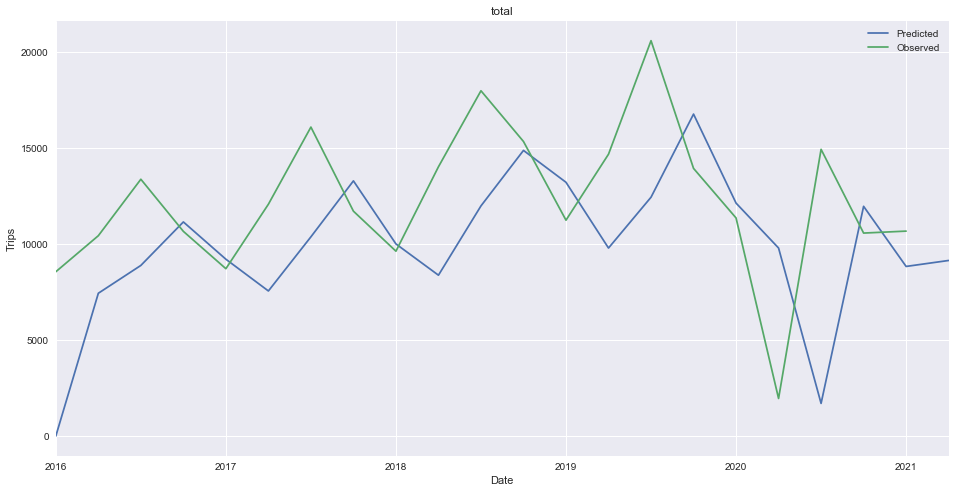

In [18]:
plot_results(pred_bu_arima, hierarchy_df, ['total'], mae_bu_arima)

MAE: 773.82


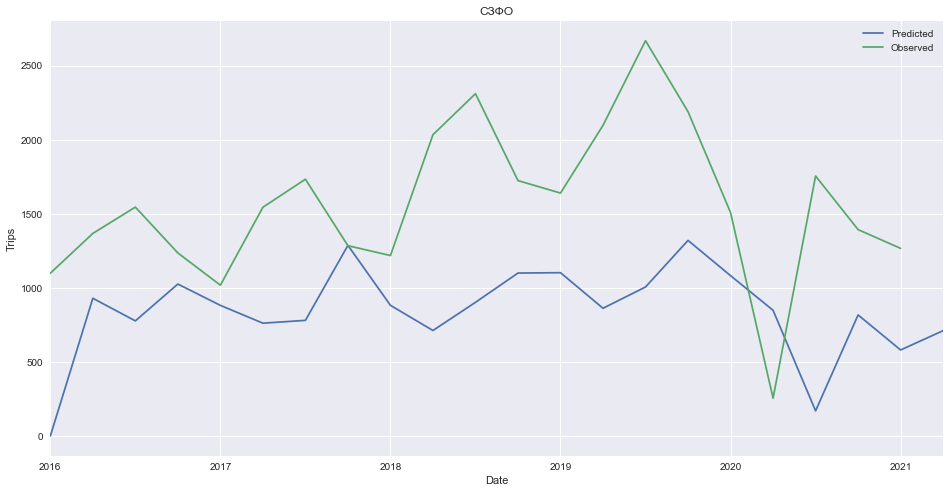

In [19]:
plot_results(pred_bu_arima, hierarchy_df, ['СЗФО'], mae_bu_arima)

MAE: 234.69


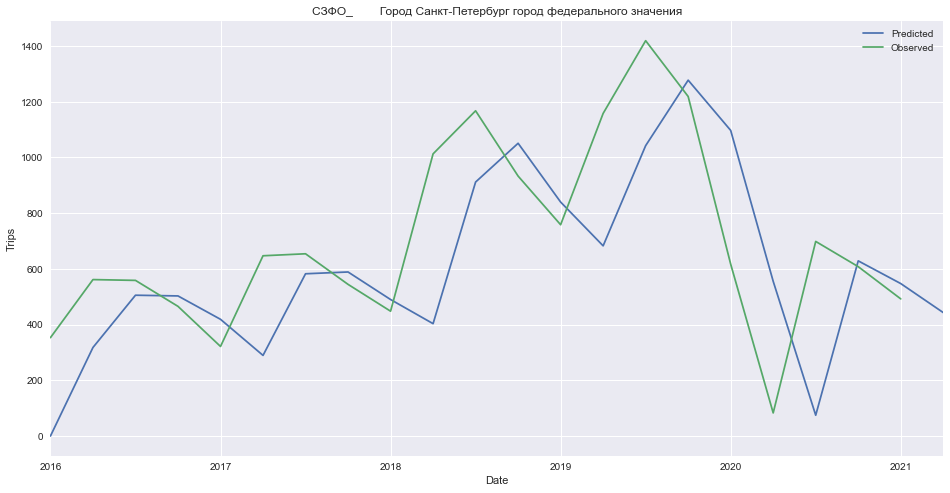

In [20]:
plot_results(pred_bu_arima, hierarchy_df, ['СЗФО_        Город Санкт-Петербург город федерального значения'], mae_bu_arima)

In [21]:
# one of top-down approaches
model_td_arima = hts.HTSRegressor(model='sarimax', revision_method='AHP', n_jobs=0)
model_td_arima = model_td_arima.fit(hierarchy_df, hierarchy)
pred_td_arima = model_td_arima.predict(steps_ahead=steps_ahead)
mae_td_arima = get_mae(pred_td_arima, hierarchy_df, steps_ahead)

Fitting models: 100%|█████████████████████████████████████████████████████████████████| 91/91 [00:00<00:00, 248.64it/s]


MAE: 4211.98


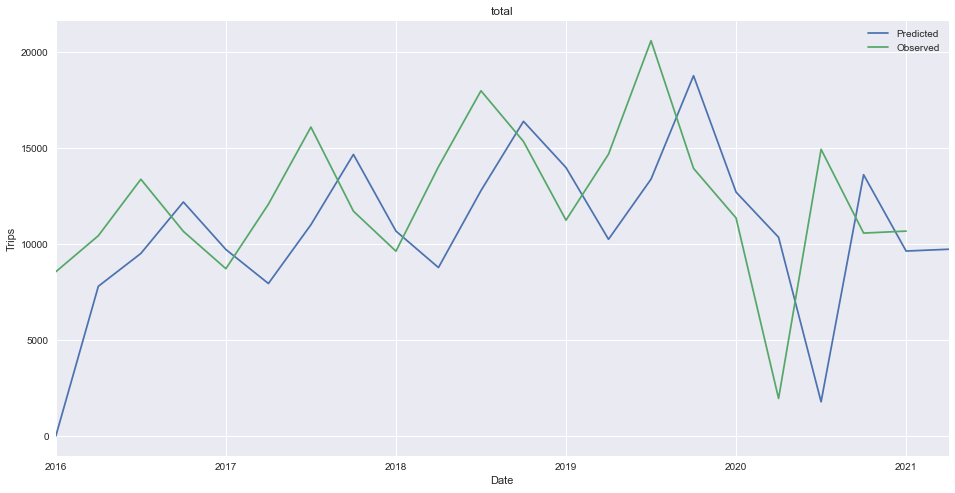

In [22]:
plot_results(pred_td_arima, hierarchy_df, ['total'], mae_td_arima)

MAE: 732.45


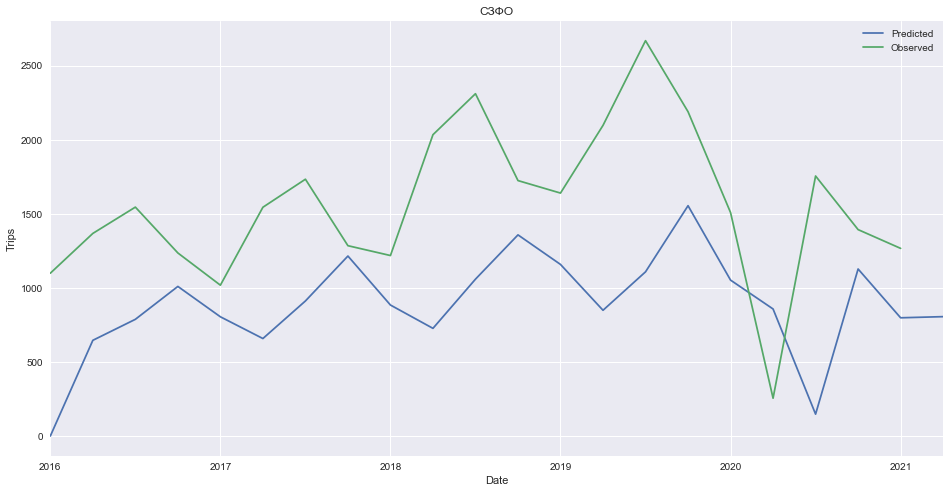

In [23]:
plot_results(pred_td_arima, hierarchy_df, ['СЗФО'], mae_td_arima)

MAE: 259.49


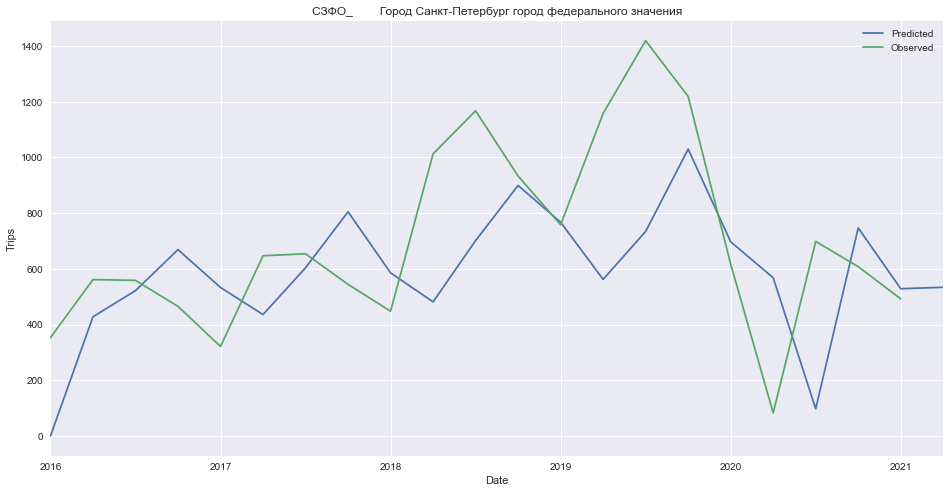

In [24]:
plot_results(pred_td_arima, hierarchy_df, ['СЗФО_        Город Санкт-Петербург город федерального значения'], mae_td_arima)

In [25]:
# optimal reconciliation approach
model_ols_arima = hts.HTSRegressor(model='sarimax', revision_method='OLS', n_jobs=0)
model_ols_arima = model_ols_arima.fit(hierarchy_df, hierarchy)
pred_ols_arima = model_ols_arima.predict(steps_ahead=2)
mae_ols_arima = get_mae(pred_ols_arima, hierarchy_df, steps_ahead)

Fitting models: 100%|█████████████████████████████████████████████████████████████████| 91/91 [00:00<00:00, 202.67it/s]


MAE: 4186.66


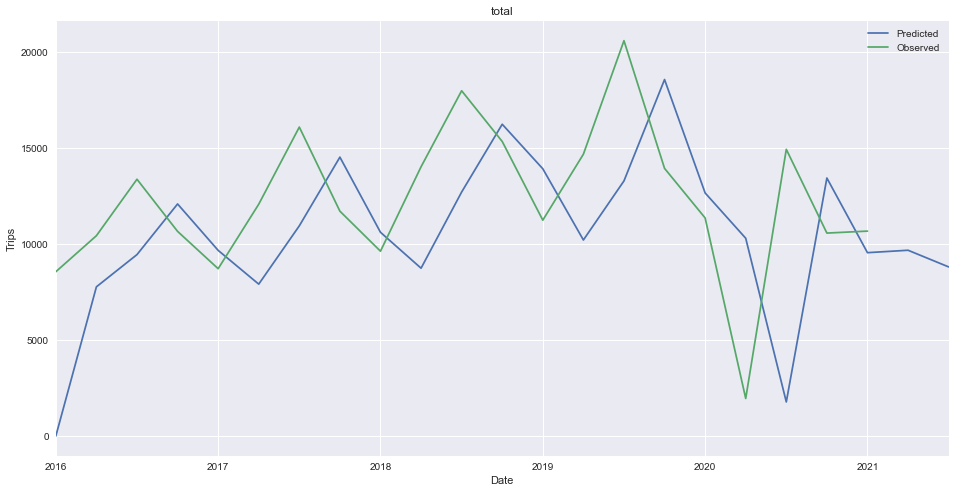

In [26]:
plot_results(pred_ols_arima, hierarchy_df, ['total'], mae_ols_arima)

MAE: 497.12


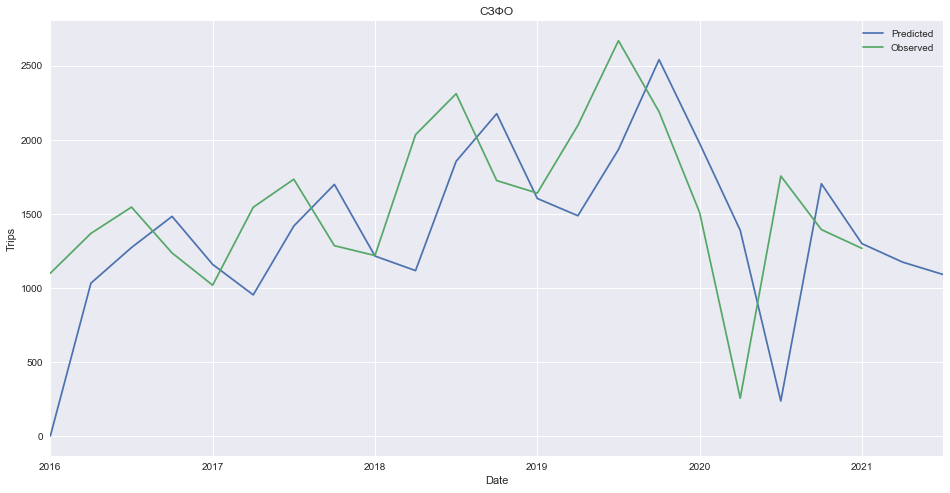

In [27]:
plot_results(pred_ols_arima, hierarchy_df, ['СЗФО'], mae_ols_arima)

MAE: 232.62


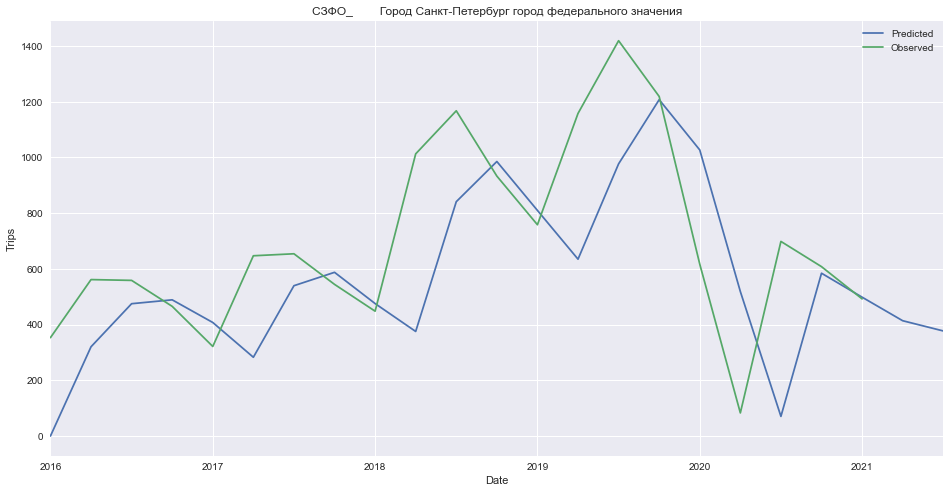

In [28]:
plot_results(pred_ols_arima, hierarchy_df, ['СЗФО_        Город Санкт-Петербург город федерального значения'], mae_ols_arima)